Data Processing

In [ ]:
import pandas as pd

In [ ]:
data_set = pd.read_csv("/content/laptop_price.csv", encoding = "latin-1")
data_set

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
1302*13

16926

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Dataset Pre Processing

In [ ]:
print("Checking Null Values")
data_set.isnull().sum()

Checking Null Values


laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
data_set = data_set.drop("Product", axis = 1) # Dropping Product coloumn
data_set.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [ ]:
print(data_set.dtypes)

laptop_ID             int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object


In [ ]:
data_set = data_set.join(pd.get_dummies(data_set.Company)) #Converting catagorical variable into indicator variable
data_set = data_set.drop("Company", axis = 1)

In [ ]:
data_set = data_set.join(pd.get_dummies(data_set.TypeName)) #Converting catagorical variable into indicator variable
data_set = data_set.drop("TypeName", axis = 1)

In [ ]:
data_set["ScreenResolution"] = data_set.ScreenResolution.str.split(" ").apply(lambda x:x[-1]) #Taking only the screen resolution into consideration
data_set["Screen Width"] = data_set.ScreenResolution.str.split("x").apply(lambda x:x[0])
data_set["Screen Height"] = data_set.ScreenResolution.str.split("x").apply(lambda x:x[1])


In [ ]:
data_set = data_set.drop("ScreenResolution" , axis=1)


In [ ]:
data_set["CPU Brand"] = data_set.Cpu.str.split(" ").apply(lambda x:x[0]) #Taking only the brand name into consideration
data_set["CPU Frequency"] = data_set.Cpu.str.split(" ").apply(lambda x:x[-1]) #Taking only the frequency into consideration

In [ ]:
data_set = data_set.drop("Cpu",axis=1)

In [ ]:
data_set['CPU Frequency'] = data_set["CPU Frequency"].str[:-3]  #Removing GHz

In [ ]:
data_set["Ram"] = data_set["Ram"].str[:-2] #Removing GB

In [ ]:
data_set["Ram"] = data_set["Ram"].astype("int")
data_set["CPU Frequency"] = data_set["CPU Frequency"].astype("float")
data_set["Screen Width"] = data_set["Screen Width"].astype("int")
data_set["Screen Height"] = data_set["Screen Height"].astype("int")

In [ ]:
data_set["Memory Amount"] = data_set.Memory.str.split(" ").apply(lambda x:x[0]) #Taking only the amount of memory into consideration
data_set["Memory Type"] = data_set.Memory.str.split(" ").apply(lambda x:x[1]) #Taking only the type of the memory into consideration

In [ ]:
data_set["Memory Amount"].value_counts()

256GB    508
1TB      240
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
1.0TB     10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: Memory Amount, dtype: int64

In [ ]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [ ]:
data_set["Memory Amount"] = data_set["Memory Amount"].apply(turn_memory_into_MB)

In [ ]:
data_set = data_set.drop("Memory", axis=1)

In [ ]:
data_set


,laptop_ID,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Acer,Apple,Asus,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency,Memory Amount,Memory Type
0,1,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,1,0,...,0,0,1,0,2560,1600,Intel,2.3,128000.0,SSD
1,2,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,1,0,...,0,0,1,0,1440,900,Intel,1.8,128000.0,Flash
2,3,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,0,0,0,...,0,1,0,0,1920,1080,Intel,2.5,256000.0,SSD
3,4,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,1,0,...,0,0,1,0,2880,1800,Intel,2.7,512000.0,SSD
4,5,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,1,0,...,0,0,1,0,2560,1600,Intel,3.1,256000.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,Intel HD Graphics 520,Windows 10,1.8kg,638.00,0,0,0,...,0,0,0,0,1920,1080,Intel,2.5,128000.0,SSD
1299,1317,13.3,16,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,0,0,0,...,0,0,0,0,3200,1800,Intel,2.5,512000.0,SSD
1300,1318,14.0,2,Intel HD Graphics,Windows 10,1.5kg,229.00,0,0,0,...,0,1,0,0,1366,768,Intel,1.6,64000.0,Flash
1301,1319,15.6,6,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,0,0,...,0,1,0,0,1366,768,Intel,2.5,1000000.0,HDD


In [ ]:
data_set["Weight"] = data_set["Weight"].str[:-2]

In [ ]:
data_set["Weight"] = data_set["Weight"].astype("float")

In [ ]:
data_set["GPU Brand"] = data_set.Gpu.str.split(" ").apply(lambda x: x[0])

In [ ]:
data_set = data_set.drop("Gpu", axis=1)

In [ ]:
data_set = data_set.join(pd.get_dummies(data_set.OpSys))
data_set = data_set.drop("OpSys", axis=1)

In [ ]:
data_set

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,GPU Brand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,Intel,0,0,0,0,1,0,0,0,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,AMD,0,0,0,0,0,0,0,0,1
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,Intel,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,Intel,0,0,0,0,0,1,0,0,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,AMD,0,0,0,0,0,1,0,0,0


In [ ]:
#Now as we have GPU and CPU brand in object type, it also needs to be converted. Thus, we have to again catagorize GPU Brand and CPU brand. But same company can crerate CPU as well as GPU.As a result we can get same coloumn names. This we need to catagorize it in a different way

In [ ]:
cpu_categories = pd.get_dummies(data_set["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

data_set = data_set.join(cpu_categories)
data_set = data_set.drop("CPU Brand", axis=1)

In [ ]:
gpu_categories = pd.get_dummies(data_set["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

data_set = data_set.join(gpu_categories)
data_set = data_set.drop("GPU Brand", axis=1)

In [ ]:
data_set

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Windows 10 S,Windows 7,macOS,AMD_CPU,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU
0,1,13.3,8,1.37,1339.69,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2,13.3,8,1.34,898.94,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,3,15.6,8,1.86,575.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,15.4,16,1.83,2537.45,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,5,13.3,8,1.37,1803.60,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1299,1317,13.3,16,1.30,1499.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1300,1318,14.0,2,1.50,229.00,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1301,1319,15.6,6,2.19,764.00,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Finding Correlations

In [ ]:
target_correlations = data_set.corr()['Price_euros'].apply(abs).sort_values()

<ipython-input-57-5c140e096530>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlations = data_set.corr()['Price_euros'].apply(abs).sort_values()


In [ ]:
target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS                 0.177094
MSI     

In [ ]:
#Here we can see that Ram is the highest indicator of price, that is ram is very important while determining the price of the laptop

In [ ]:
selected_features = target_correlations[-21:].index

In [ ]:
selected_features = list(selected_features)

In [ ]:
selected_features

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'CPU Frequency',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [ ]:
limited_df = data_set[selected_features]

<Axes: >

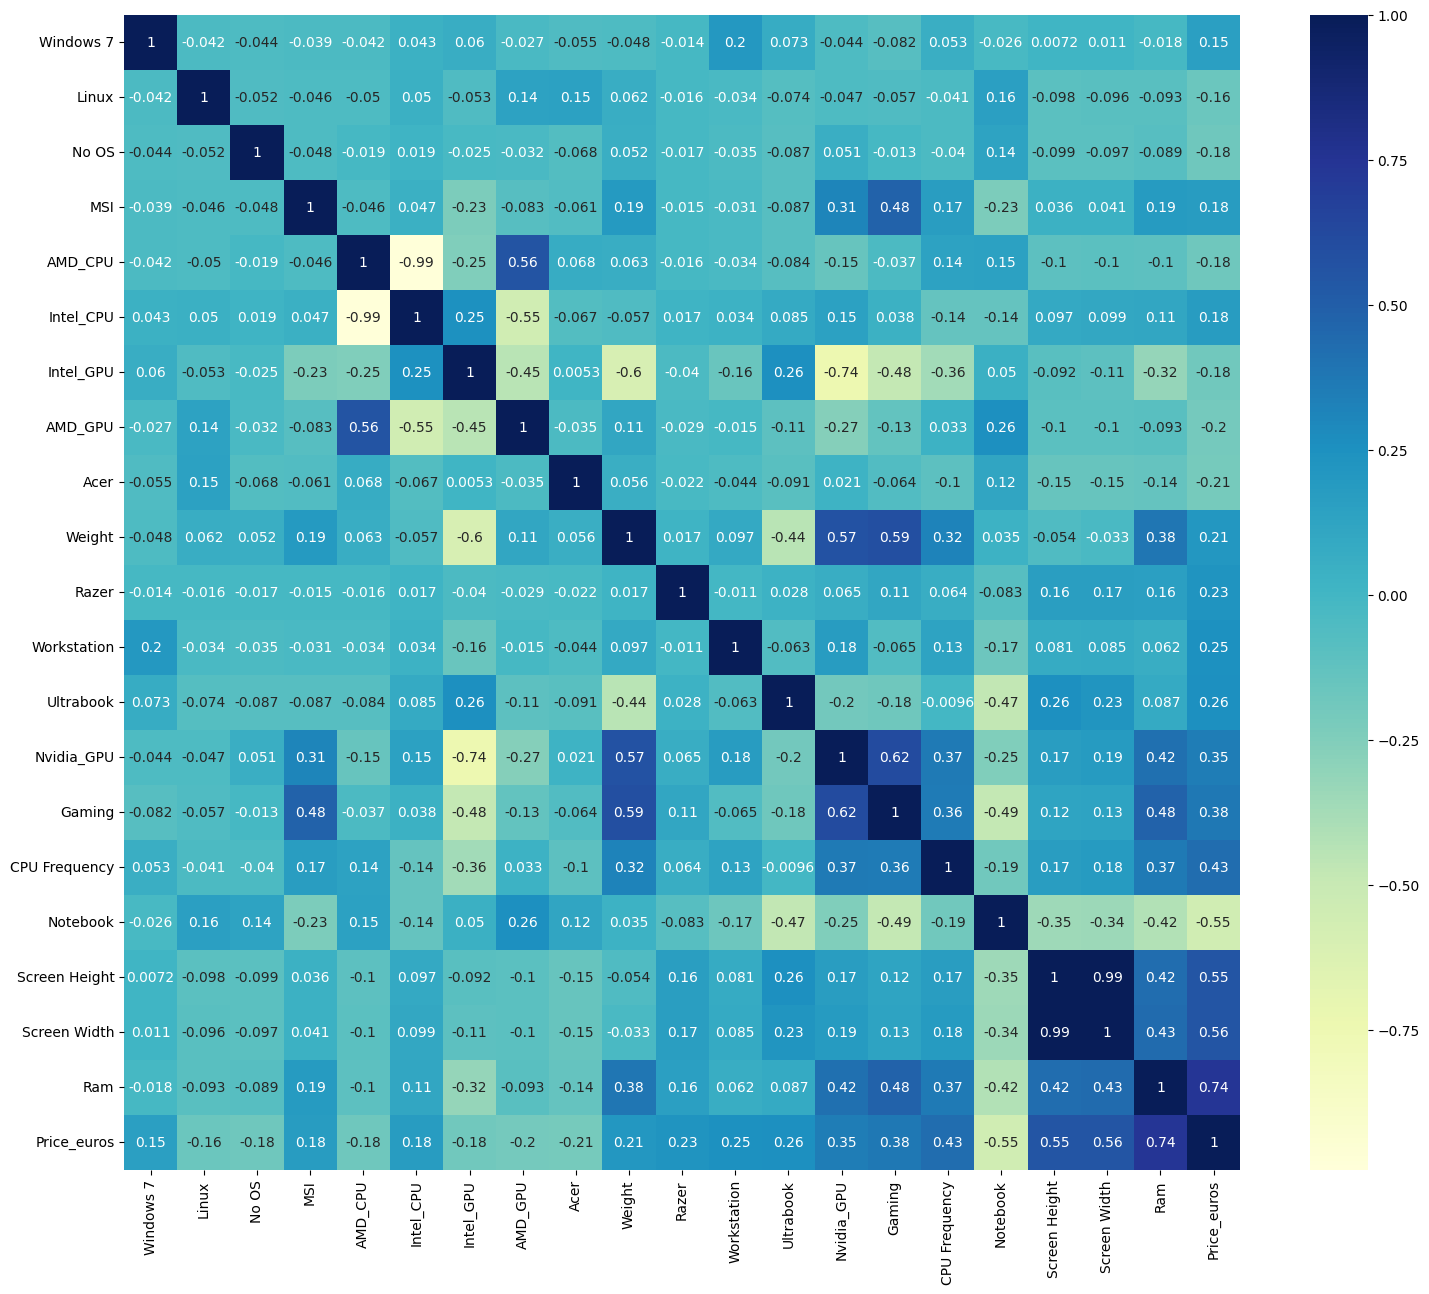

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

Splitting and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
X, y = limited_df.drop("Price_euros", axis=1), limited_df["Price_euros"]
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.30,random_state = 42)


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

Model 1: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(X_train_std,Y_train )

RandomForestRegressor()

In [ ]:
forest_score = forest.score(X_test_std,Y_test )

In [ ]:
forest_score

0.8049186826622174

In [ ]:
prediction_forest = forest.predict(X_test_std)

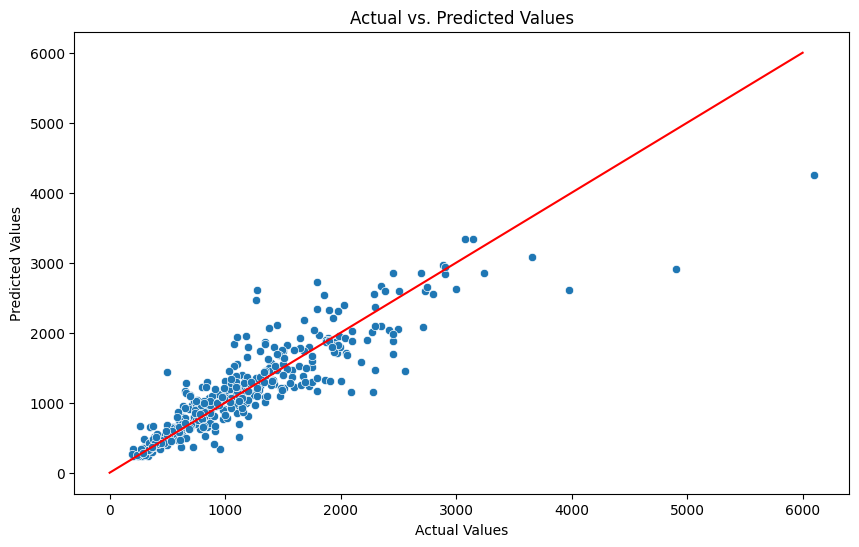

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=prediction_forest)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot(range(0, 6000),range(0, 6000),color = "red")
plt.show()

MODEL 2: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rid= Ridge()
rid.fit(X_train_std,Y_train)

Ridge()

In [ ]:
rid_score = rid.score(X_test_std,Y_test)

In [ ]:
rid_score

0.7462672673984604

In [ ]:
rid_predict = rid.predict(X_test_std)

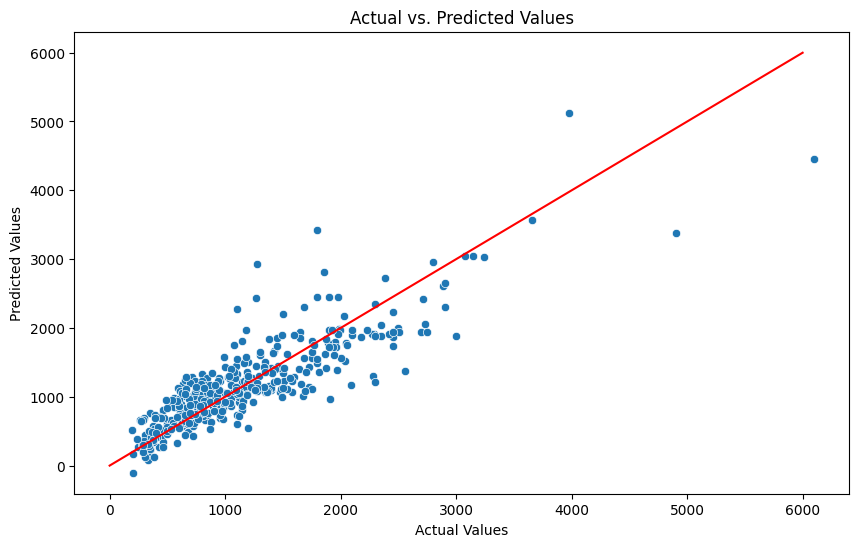

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=rid_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot(range(0, 6000),range(0, 6000),color = "red")
plt.show()

MODEL 3: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train_std,Y_train)

LinearRegression()

In [ ]:
regr_score = regr.score(X_test_std,Y_test)

In [ ]:
regr_score

0.7457320387312529

In [ ]:
regr_predict = regr.predict(X_test_std)

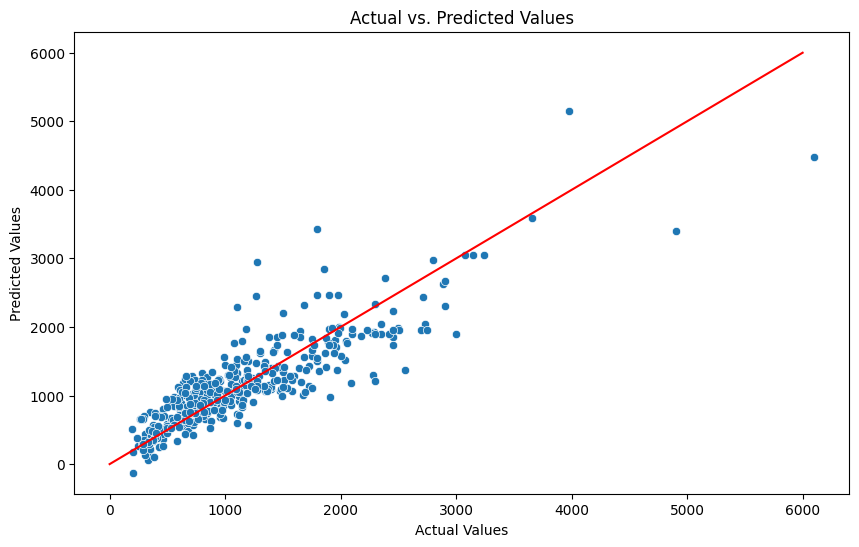

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=regr_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot(range(0, 6000),range(0, 6000),color = "red")
plt.show()

Comparing the models

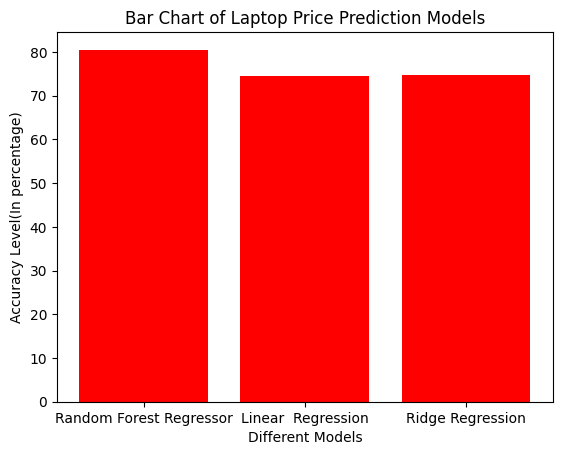

In [ ]:
x_axis = ['Random Forest Regressor', 'Linear  Regression', 'Ridge Regression']
y_axis = [forest_score*100, regr_score*100, rid_score*100]

plt.bar(x_axis, y_axis,color= 'red')
plt.title('Bar Chart of Laptop Price Prediction Models')
plt.xlabel('Different Models')
plt.ylabel('Accuracy Level(In percentage)')
plt.show()